<a href="https://colab.research.google.com/github/sachinkun21/PyTorch/blob/master/Use_Case_1_Handwritten_Digit_Classification_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

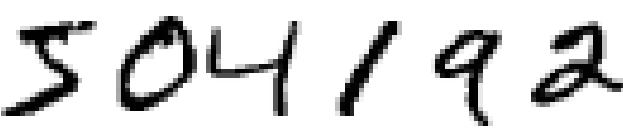


Can You recognise these characters? Yes they are digits!
But how can we make machine recognise them.

This is what I am going to demonstrate in this Notebook using pytorch framework

In the 1st Notebook, we saw a simple use case of PyTorch for writing a neural network from scratch. In this Notebook, we are going to use different utility packages provided within PyTorch i.e.(nn, autograd, optim, torchvision, torchtext, etc.) to build and train neural network.

In this use case, we will create a **Multi-Layered Perceptron (MLP)** network for building a handwritten digit classifier. We will make use of the MNIST dataset included in the torchvision package for training and testing our network.



### Data loading and Preprocessing
The first step, as with any project you’ll work on, is data preprocessing. We need to transform the raw dataset into tensors and normalize them in a fixed range. The torchvision package provides a utility called transforms which can be used to combine different transformations together.

In [0]:
from torchvision import transforms

_tasks = transforms.Compose([
                             transforms.ToTensor(), 
                             transforms.Normalize((0.5,), (0.5,))
                            ])

1. The first transformation converts the raw data into tensor variables 
2. The second transformation performs normalization using the below operation:
                    ```
                    x_normalized = x-mean / std
                    ```


The values 0.5 and 0.5 represent the mean and standard deviation for 3 channels: red, green, and blue.

Let's import the dataset now:

In [60]:
from torchvision.datasets import MNIST

# Loading the MNIST Dataset and applying transform function
mnist = MNIST("data" , download = True , train = True, transform = _tasks)
mnist

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

Another excellent utility of PyTorch is **DataLoader** iterators which provide the ability to batch, shuffle and load the data in parallel using multiprocessing workers. 

For the purpose of evaluating our model, we will also partition our data into training and validation sets using SubSetSampler.

In [0]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [0]:
# Creating training (80%) and Validation (20%) sets
split_size = int(0.8 * len(mnist))
index_list = list(range(len(mnist)))
train_idx , valid_idx = index_list[:split_size], index_list[split_size : ]

In [0]:
# Creating two sampler objects using SubSetRandomSampler utility
tr_sampler = SubsetRandomSampler(train_idx)
val_sampler= SubsetRandomSampler(valid_idx)


In [64]:
# Create iterator Objects for train and valid Datasets
train_loader = DataLoader(mnist, batch_size= 256 , sampler = tr_sampler)
valid_loader =  DataLoader(mnist , batch_size = 256 , sampler= val_sampler)
len(train_loader) , len(valid_loader)

(188, 47)

The neural network architectures in PyTorch can be defined in a class which inherits the properties from the base class from nn package called **Module.**

This inheritance from the nn.Module class allows us to implement, access, and call a number of methods easily. We can define all the layers inside the constructor of the class, and the forward propagation steps inside the forward function.

- We will define a network with the following layer configurations: [784, 128,10].
- This configuration represents the 784 nodes (28*28 pixels) in the input layer, 128 in the hidden layer, and 10 in the output layer.
- Inside the forward function, we will use the sigmoid activation function in the hidden layer (which can be accessed from the nn module).

In [0]:
import torch.nn.functional as F
import torch.nn as nn

In [0]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(784,128)
    self.output = nn.Linear(128,10)

  def forward(self, x):
     x = self.hidden(x)
     x = F.sigmoid(x)
     x = self.output(x)
     return x


In [0]:
# Creating Model Object
model = Model()

Let's define the loss function and the optimizer using nn and omptim package

In [0]:
from torch import optim

# loss function
loss_func = nn.CrossEntropyLoss()

# SGD optimizer
optimizer = optim.SGD(model.parameters() , lr = 0.01 , weight_decay = 1e-6 , momentum = 0.9 , nesterov = True)

#### **Training the Model**
We are now ready to train the model. The core steps will remain the same as we saw earlier: 
1. Forward Propagation
2. Loss Computation
3. Backpropagation
4. Updating the parameters.

We will run the above steps 10 times and call each step as epoch.
Let's start

In [69]:
for epoch in range(1,11):
  train_loss, valid_loss = [], []

  # Training 
  model.train()
  for data , target in train_loader:
      # Flatten MNIST images into a 784 long vector
      #data = data.view(data.shape[0], -1)
      optimizer.zero_grad()

      # 1. Forward Propagation
      output = model(data)

      # 2. Loss Calculation
      loss = loss_func(output, target)

      # 3. Backward propagation
      loss.backward()

      # 4. Weight Optimization
      opitmizer.step()

      train_loss.append(loss.item())

  # Evaluation 
  model.eval()
  for data, target in valid_loader:
    output = model(data)
    loss = loss_func(output , target)
    valid_loss.append(loss.item())
  print("Epoch: " , epoch, "Training Loss: ", np.mean(train_loss) , "Validation Loss: ", np.mean(valid_loss))

RuntimeError: ignored

In [0]:
for data,target in train_loader:
  print((data),(target))
  break

In [72]:
print(train_loader)

#### **Predictions**
Once the model is trained, make the predictions on the validation data.

In [0]:
## dataloader for validation dataset 
dataiter = iter(validloader)
data, labels = dataiter.next()
output = model(data)

In [0]:
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy())

In [0]:
print ("Actual:", labels[:10])
print ("Predicted:", preds[:10])